In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
cols = ['content', 'date']

In [10]:
cd C:\Users\ACER\Documents\project\csv

C:\Users\ACER\Documents\project\csv


In [11]:
df = pd.read_csv("buhari2.csv", header=None, names=cols)

In [27]:
df.head()

,content
0,Buhari's change administration spent N5.58 Tri...
1,I want to congratulate President Buhari s admi...
2,Democracy Day Dogara Scores Buhari’s Administ...
3,Two years of Buhari's Administration Gell Well...
4,At the 2nd Year Commemorative Anniversary of P...


In [28]:
df.drop(['date'],axis=1,inplace=True)

KeyError: "['date'] not found in axis"

In [55]:
from textblob import TextBlob

In [56]:
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [57]:
df['Polarity'] = df['content'].apply(sentiment).apply(lambda x: x[0])

In [58]:
df.head()

,content,Polarity
0,Buhari's change administration spent N5.58 Tri...,-0.125
1,I want to congratulate President Buhari s admi...,0.000
2,Democracy Day Dogara Scores Buhari’s Administ...,0.160
3,Two years of Buhari's Administration Gell Well...,0.000
4,At the 2nd Year Commemorative Anniversary of P...,0.000


In [59]:
%time

#Assigning score categories and logic
i = 0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(df)):
    if ((df.iloc[i]['Polarity'] > 0)):
        predicted_value.append('positive')#positive
        i = i+1
    #elif ((df.iloc[i]['VADER score'] > -0.05) & (df.iloc[i]['VADER score'] < 0.05)):
       # predicted_value.append(2)#neutral
       # i = i+1
    elif ((df.iloc[i]['Polarity'] == 0)):
        predicted_value.append('neutral')#neutral
        i = i+1
    else:
        predicted_value.append('negative')#negative
        i = i+1
        

Wall time: 0 ns


In [60]:
df['sentiment'] = predicted_value

In [61]:
df.head(20)

,content,Polarity,sentiment
0,Buhari's change administration spent N5.58 Tri...,-0.125000,negative
1,I want to congratulate President Buhari s admi...,0.000000,neutral
2,Democracy Day Dogara Scores Buhari’s Administ...,0.160000,positive
3,Two years of Buhari's Administration Gell Well...,0.000000,neutral
4,At the 2nd Year Commemorative Anniversary of P...,0.000000,neutral
5,"The Buhari's Administration @ 2, How has this ...",0.000000,neutral
6,For APC to win the elections in they nee...,0.500000,positive
7,Apart from minimal achievement recorded in sec...,0.053333,positive
8,Two years in Buhari s administration we are n...,0.500000,positive
9,APC loses own poll as Nigerians rate Buhari s ...,-0.033333,negative


In [62]:
df.sentiment.value_counts()

positive    824
neutral     677
negative    616
Name: sentiment, dtype: int64

In [63]:
import nltk
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
import re
from bs4 import BeautifulSoup
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS
import preprocessor as p


In [64]:
df['content'].apply(lambda x: re.split('(http/s:\/\/.*)|(pic*)|(twitter.com/S+)', str(x))[0])

0       Buhari's change administration spent N5.58 Tri...
1       I want to congratulate President Buhari s admi...
2       Democracy Day  Dogara Scores Buhari’s Administ...
3       Two years of Buhari's Administration Gell Well...
4       At the 2nd Year Commemorative Anniversary of P...
5       The Buhari's Administration @ 2, How has this ...
6       For APC to win the elections in       they nee...
7       Apart from minimal achievement recorded in sec...
8       Two years in Buhari s administration  we are n...
9       APC loses own poll as Nigerians rate Buhari s ...
10      “Bit too early to judge” Buhari’s administrati...
11      WATCH: The ups and downs of two years of Presi...
12      Nigerians rate Buhari s administration poor in...
13      Nigerians labels Buhari s administration  a fa...
14      APC loses own poll as Nigerians rate Buhari s ...
15      APC Denies Conducting Poll on Buhari’s Adminis...
16      #OfficeOfTheCitizen There were no economic dir...
17      APC lo

In [65]:
#pat1 = r'@[A-Za-z0-9_]+'
pat1 = r"([@#][A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([http/s?://[^ ]+])|(pic.*)"
#pat1=r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', tt)
pat2 = r"(pic.twitter.com\S+)|(twitter.com\S+)"
#pat2 = r'http/s?://[^]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not","govt":"government","cant":"can not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not","today's":"today","buhari's":"buhari","adminstration's":"administration","mkt":"market","th":"the","b'RT":""}

#noun_dic ={"today's":"today","buhari's":"buhari","adminstration's":"administration"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(content):
    soup = BeautifulSoup(content, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    #noun_handled = 
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [66]:
df.drop_duplicates(subset=['content'], keep=False)

,content,Polarity,sentiment
0,Buhari's change administration spent N5.58 Tri...,-0.125000,negative
1,I want to congratulate President Buhari s admi...,0.000000,neutral
2,Democracy Day Dogara Scores Buhari’s Administ...,0.160000,positive
3,Two years of Buhari's Administration Gell Well...,0.000000,neutral
4,At the 2nd Year Commemorative Anniversary of P...,0.000000,neutral
5,"The Buhari's Administration @ 2, How has this ...",0.000000,neutral
6,For APC to win the elections in they nee...,0.500000,positive
7,Apart from minimal achievement recorded in sec...,0.053333,positive
8,Two years in Buhari s administration we are n...,0.500000,positive
9,APC loses own poll as Nigerians rate Buhari s ...,-0.033333,negative


In [67]:
testing = df.content[:100]

In [68]:
test_result = []
for t in testing:
    test_result.append(tweet_cleaner_updated(t))
test_result

['buharis change administration spent trillion between july june clearing messspent trillion btw june may',
 'want to congratulate president buhari administration on the fight against corruption for contending with terrorism in the country',
 'democracy day dogara scores buharis administration highsays apc has recorded',
 'two years of buharis administration gell well soon baba elrufai',
 'at the nd year commemorative anniversary of president buharis administration held at the banquet hall state house abuja',
 'the buharis administration how has this administration performed',
 'for apc to win the elections in they need to find reasonable candidate and distance themselves from buhari administration',
 'apart from minimal achievement recorded in security buhari administration has so far performed below the high expectations of nigerians',
 'two years in buhari administration we are now better with regards to security and the economy is',
 'apc loses own poll as nigerians rate buhari adm

In [69]:
nums = [0,2115]

In [70]:
%%time
print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    if( (i+1)%2115 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[1] ))                                                                    
    clean_tweet_texts.append(tweet_cleaner_updated(df['content'][i]))

Cleaning and parsing the tweets...

Tweets 2115 of 2115 has been processed
Wall time: 2.81 s


In [71]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['Content'])
clean_df['Sentiment'] = df.sentiment
clean_df.head()

,Content,Sentiment
0,buharis change administration spent trillion b...,negative
1,want to congratulate president buhari administ...,neutral
2,democracy day dogara scores buharis administra...,positive
3,two years of buharis administration gell well ...,neutral
4,at the nd year commemorative anniversary of pr...,neutral


In [73]:
clean_df.to_csv('clean_tweetstextblob.csv',encoding='utf-8')

In [74]:
csv = 'clean_tweetstextblob.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,Content,Sentiment
0,buharis change administration spent trillion b...,negative
1,want to congratulate president buhari administ...,neutral
2,democracy day dogara scores buharis administra...,positive
3,two years of buharis administration gell well ...,neutral
4,at the nd year commemorative anniversary of pr...,neutral


# to check the of negative, positive and neutral sentiments in word cloud

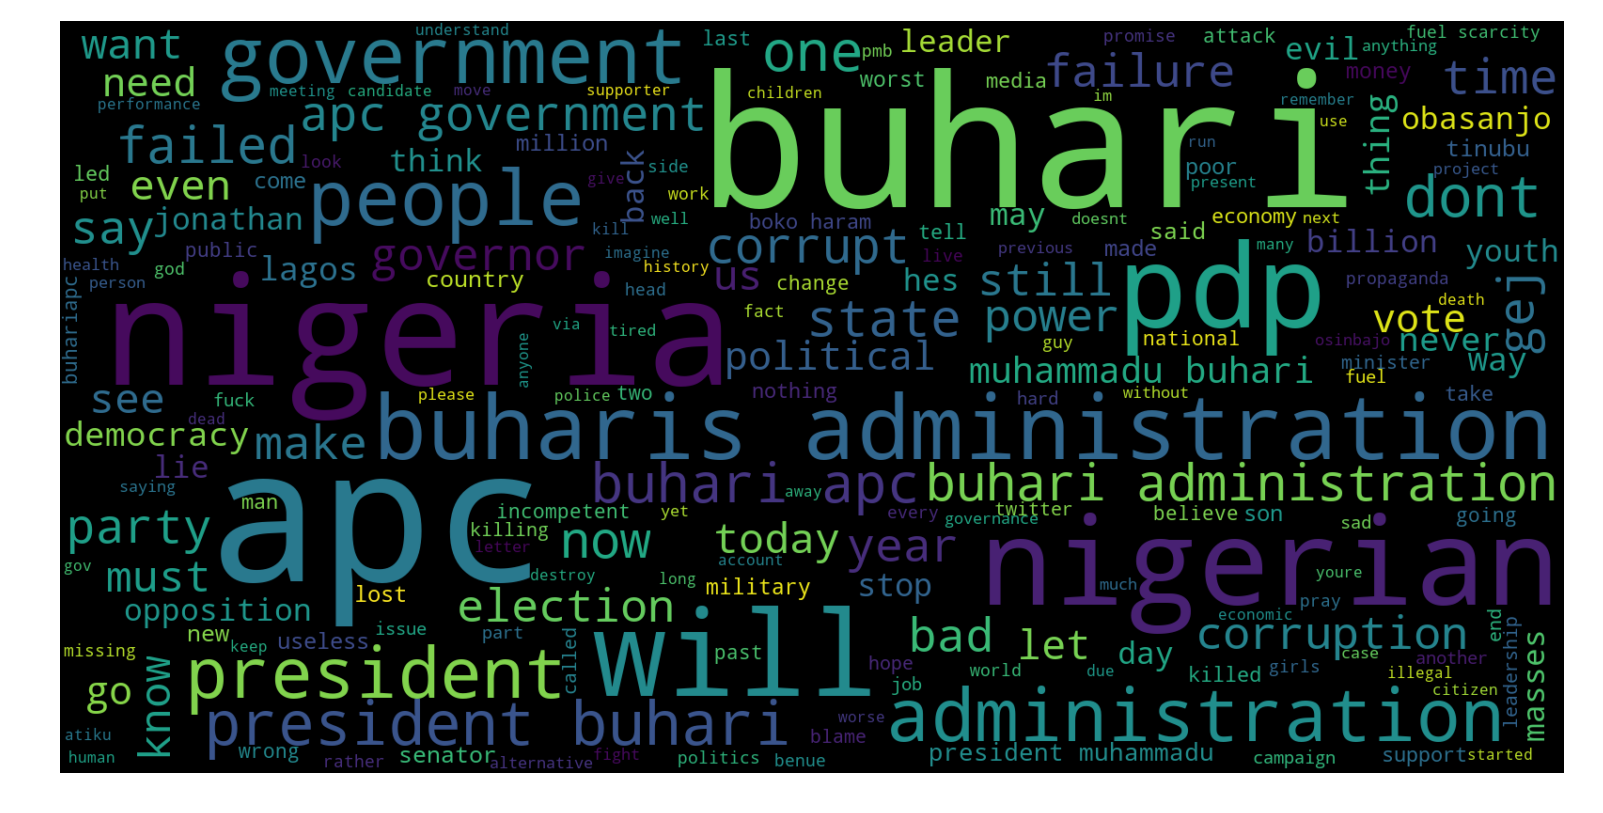

In [75]:
#wordcloud for negative sentiment
neg_tweets = my_df[my_df.Sentiment == 'negative']
neg_string = []
for t in neg_tweets.Content:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
#negative

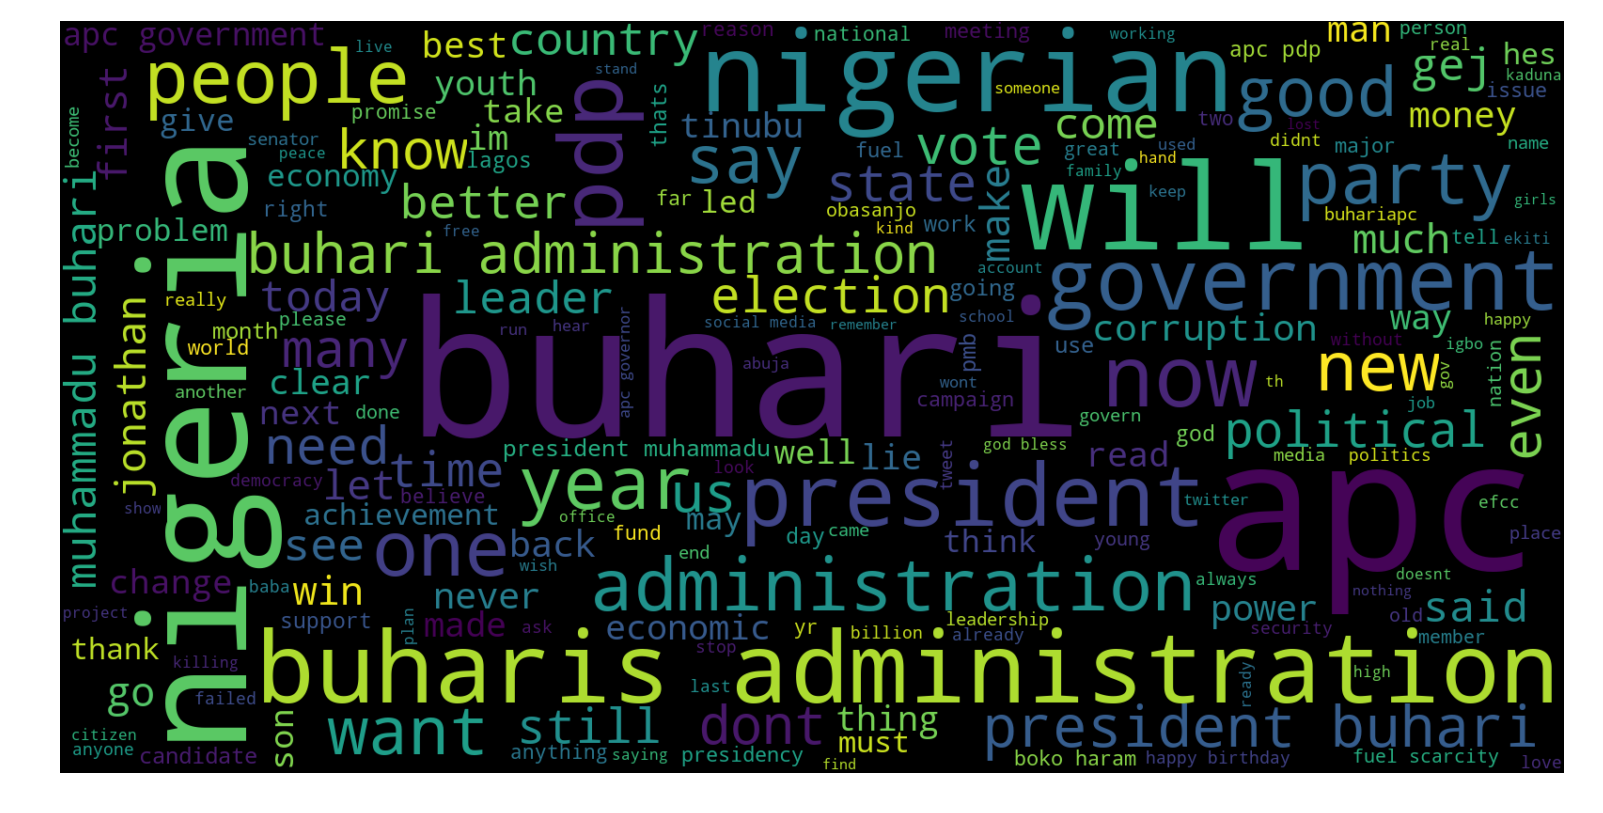

In [77]:
#positive
pos_tweets = my_df[my_df.Sentiment == 'positive']
pos_string = []
for t in pos_tweets.Content:
    pos_string.append(t)
pos_string = pd.Series(pos_string ).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string )
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

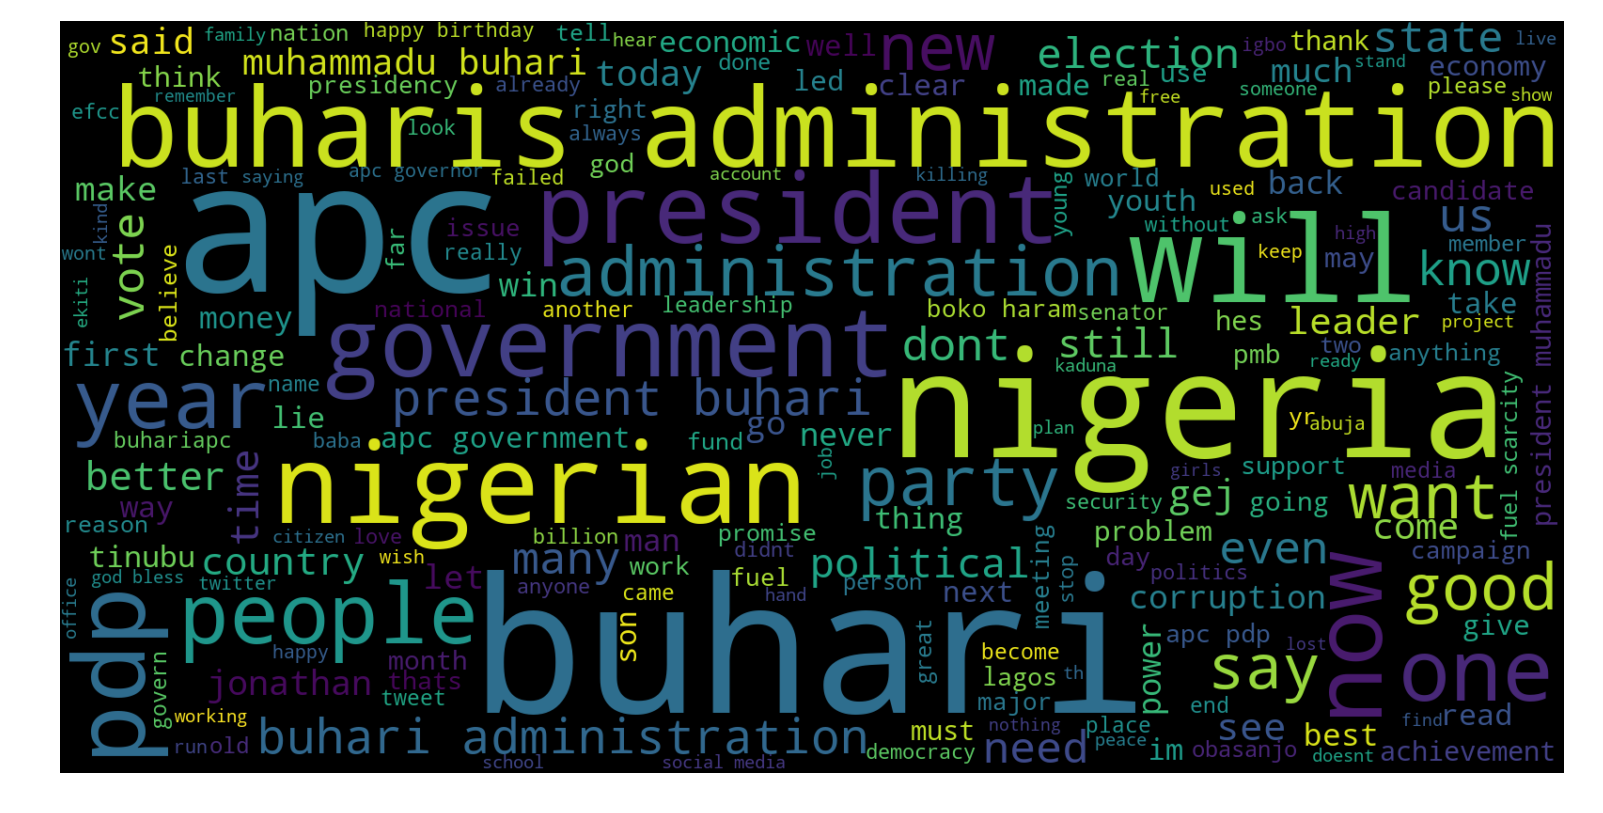

In [78]:
#neutral
neu_tweets = my_df[my_df.Sentiment == 'neutral']
neu_string = []
for t in pos_tweets.Content:
    neu_string.append(t)
neu_string = pd.Series(neu_string ).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neu_string )
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
removing stopword

In [79]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)

    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

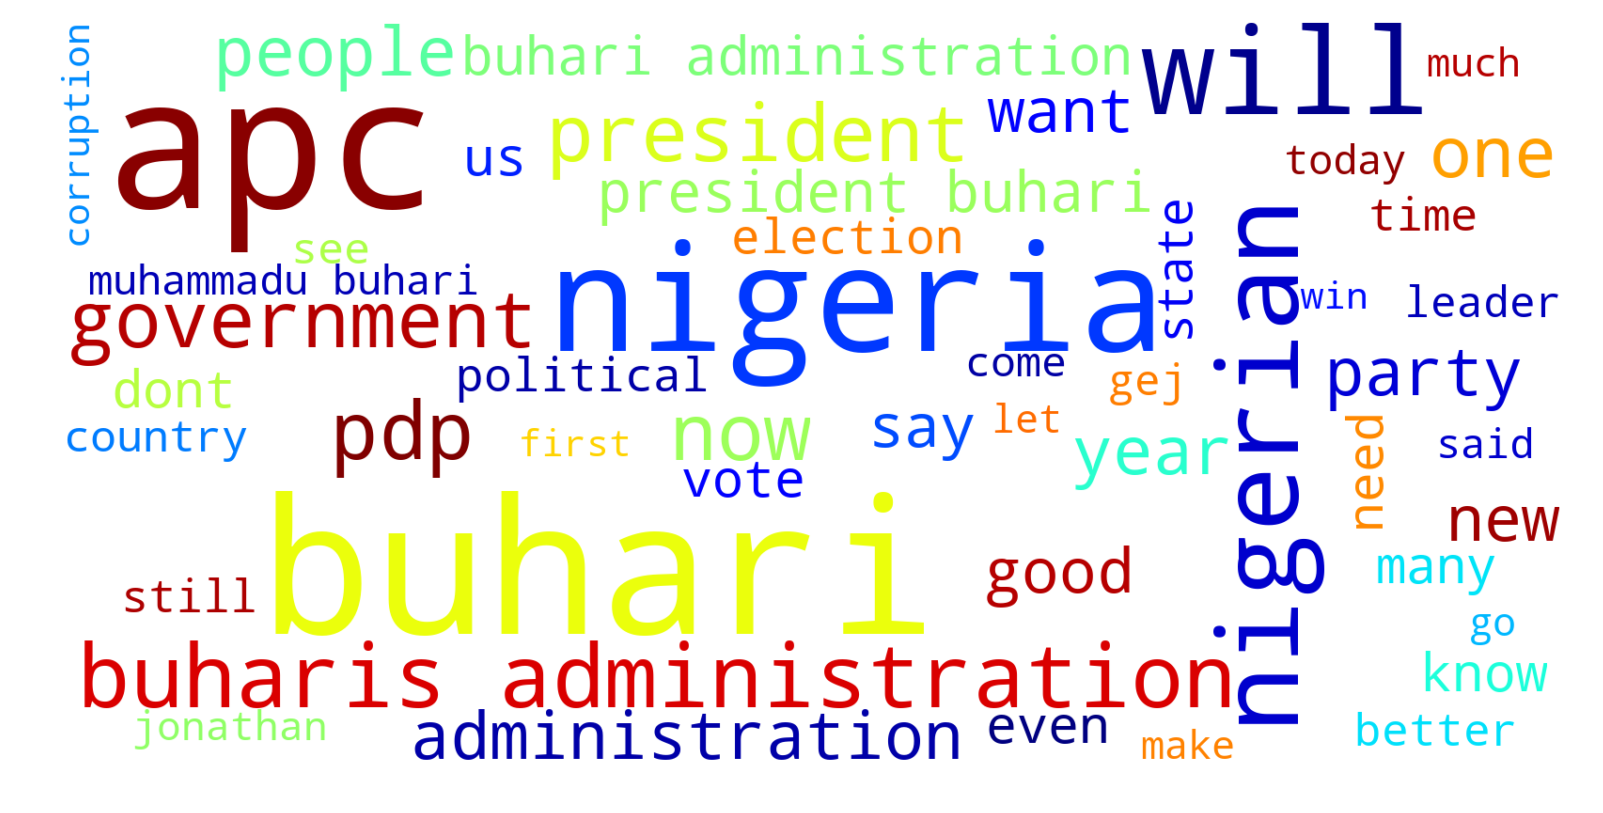

In [80]:
#Positive - Original dataset
tw_pos = my_df[my_df['Sentiment'] == 'positive']['Content']
word_cloud(tw_pos)

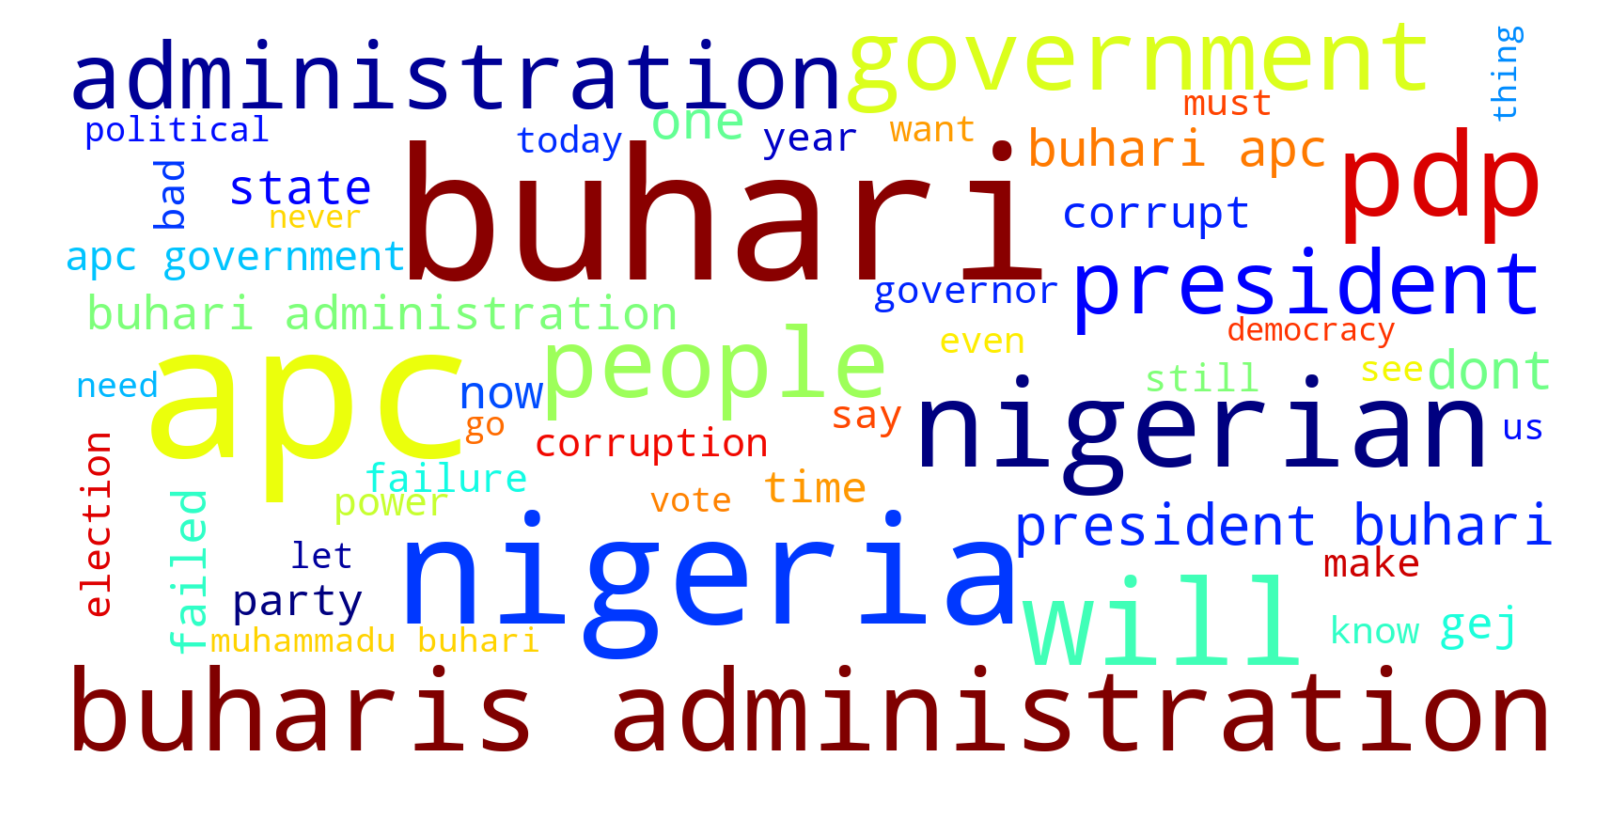

In [81]:
#negative- Original dataset
tw_neg = my_df[my_df['Sentiment'] == 'negative']['Content']
word_cloud(tw_neg)

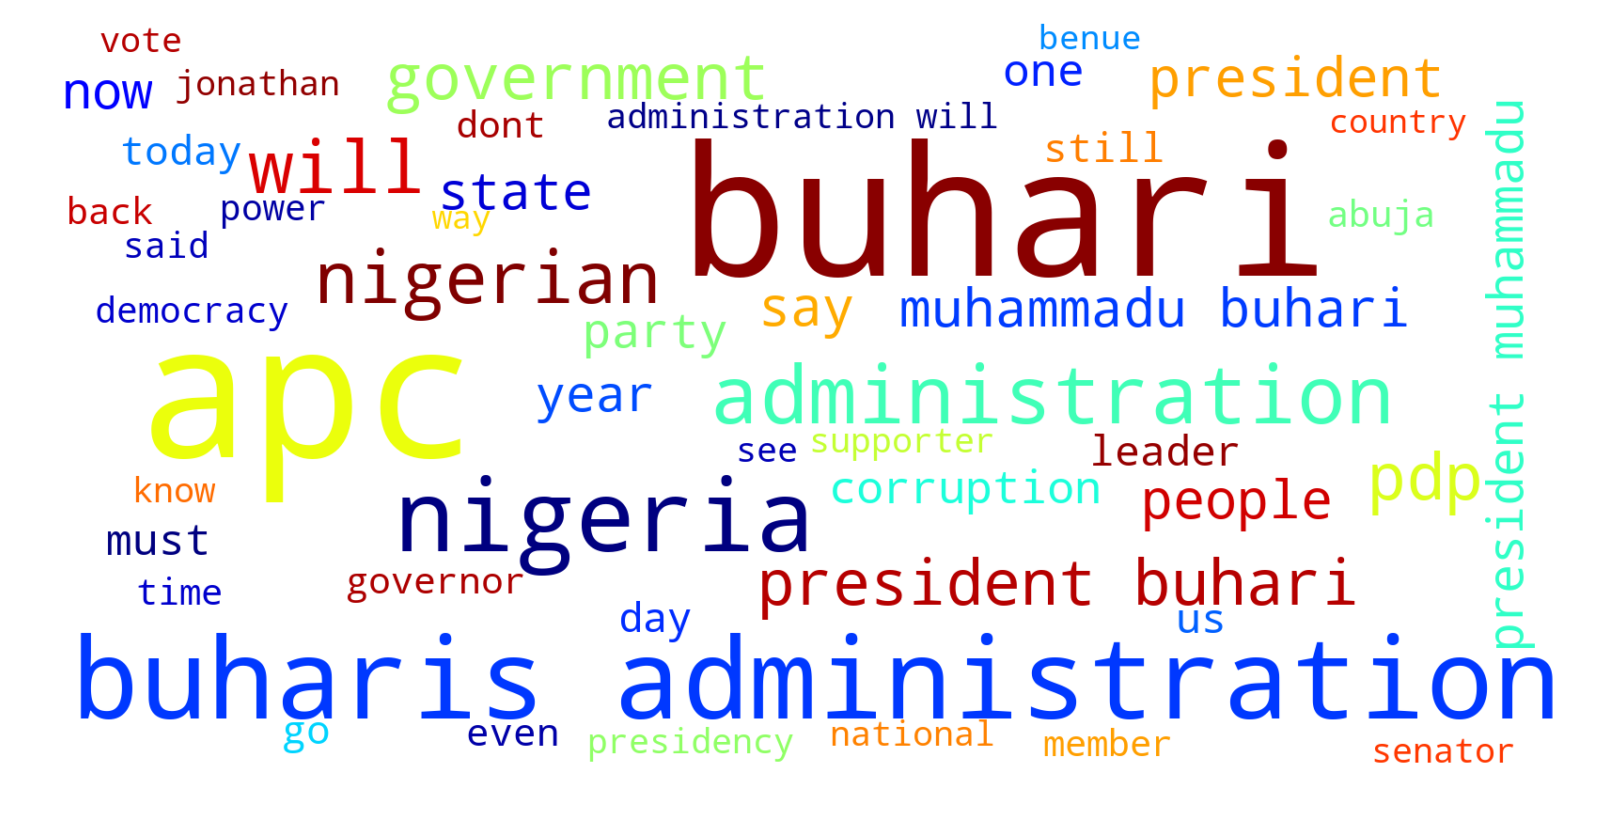

In [82]:
#neutral- Original dataset
tw_neu = my_df[my_df['Sentiment'] == 'neutral']['Content']
word_cloud(tw_neu)